In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/knn.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [4]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

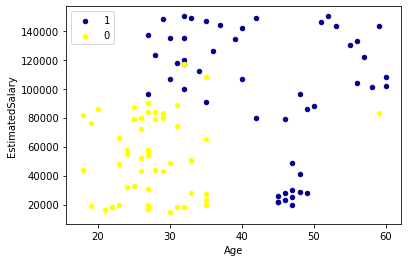

In [5]:
ax = data[data['Purchased'] == 1][0:50].plot(kind='scatter', x='Age', y='EstimatedSalary', color='DarkBlue', label='1');
data[data['Purchased'] == 0][0:50].plot(kind='scatter', x='Age', y='EstimatedSalary', color='Yellow', label='0', ax=ax);
plt.show()

Text(0, 0.5, 'EstimatedSalary')

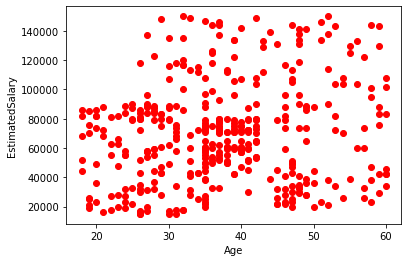

In [6]:
plt.scatter(data.Age,data.EstimatedSalary, c = 'red')
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

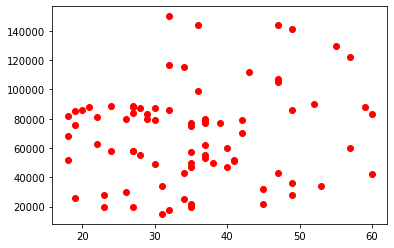

In [8]:
plt.scatter(X_test[:,0], X_test[:,1], c = 'red')

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5,metric='minkowski' ,p=2)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [12]:
#confusion metrics
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)
accuracy = metrics.accuracy_score(y_test,y_pred)
print("accuracy: ",accuracy)

[[55  3]
 [ 1 21]]
accuracy:  0.95


In [13]:
data.Purchased.unique()

array([0, 1], dtype=int64)

In [14]:
np.count_nonzero(y_pred<1)

56

In [15]:
np.count_nonzero(y_pred > 0)

24

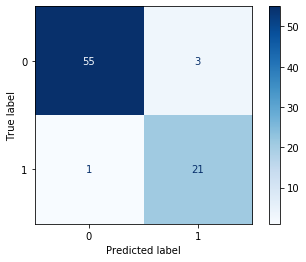

In [16]:
#Visualising confusion matrix in blocks
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)

In [17]:
from mlxtend.plotting import plot_decision_regions
from timeit import default_timer as timer 

Execution time: 2.6067661000000006


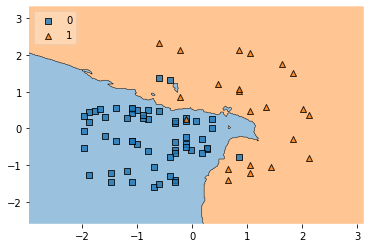

In [18]:
start = timer()
plot_decision_regions(X_test, y_test, clf=clf, legend=2)
print("Execution time:", timer()-start) 

Text(0.5, 0, 'Purcahse')

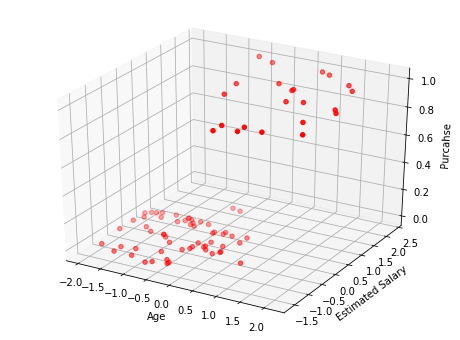

In [19]:
%matplotlib inline


# we need the below library to create 3d plots in python
from mpl_toolkits import mplot3d
# first we create a matplotlib figure and add a 3D subplot of the
# above mentioned library on the matplotlib figure
ax = plt.figure(figsize=(8, 6)).add_subplot(projection = '3d')
# function to create a 3d scatter plot
ax.scatter3D(X_test[:,0],X_test[:,1],y_test, c = 'red')
# adding the prediction line the plot
#ax.plot3D(X_train[:,0],X_train[:,1],clf.predict(X_train), c = 'blue')
ax.set_xlabel('Age')
ax.set_ylabel('Estimated Salary')
ax.set_zlabel('Purcahse')

In [20]:
acc = []
k_rng = range(1,10)
for k in k_rng:
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))

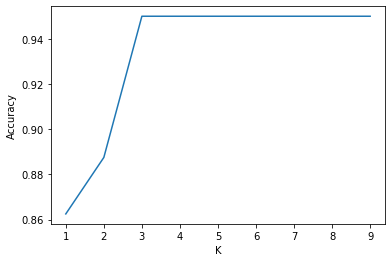

In [21]:
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(k_rng,acc)